# Classification problem Palmer Penguin Dataset
Algorithm
  - Knn
  - Random Forest
  - DecisionTreeClassifier


In [221]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import  train_test_split,GridSearchCV
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

##### Load of the Dataset

In [222]:
dataset = pd.read_csv('./Datasets/penguins.csv')

In [223]:
dataset.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


##### Data cleanup

In [224]:
dataset = dataset.drop(columns=["rowid","year","sex","island"],axis=1)
dataset.isna()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
339,False,False,False,False,False
340,False,False,False,False,False
341,False,False,False,False,False
342,False,False,False,False,False


##### Visualisation of the Features

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

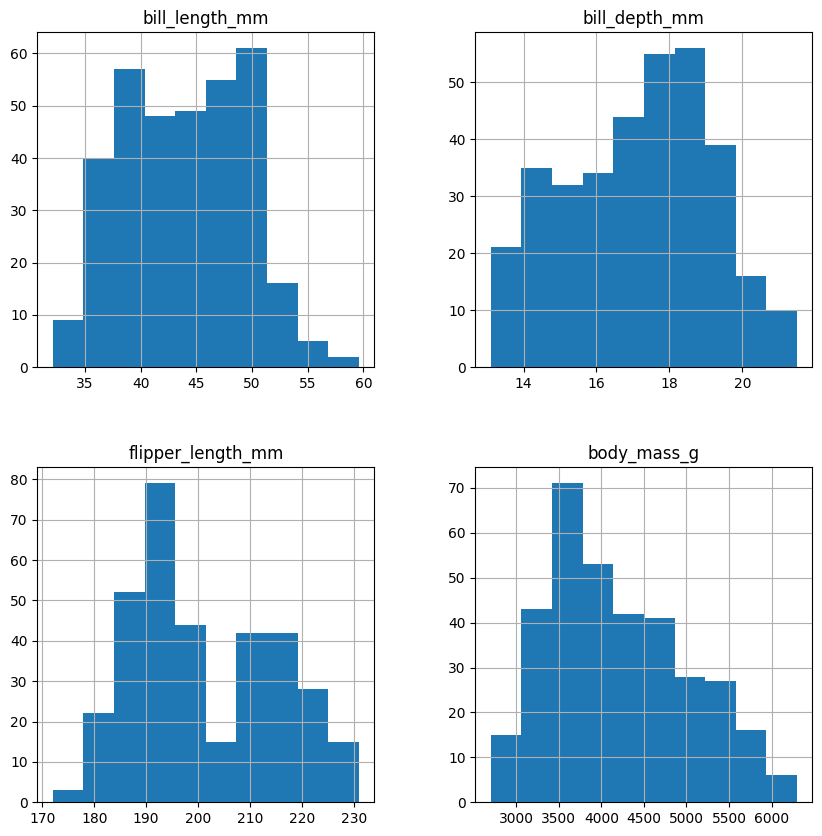

In [225]:
dataset.hist(figsize=(10,10))

##### Fill  of the missing values

In [226]:
# fill of missing values with means and median
dataset["bill_length_mm"] = dataset["bill_length_mm"].fillna(dataset["bill_length_mm"].mean())
dataset["bill_depth_mm"] = dataset["bill_depth_mm"].fillna(dataset["bill_depth_mm"].mean())
dataset["flipper_length_mm"] =dataset["flipper_length_mm"].fillna(dataset['flipper_length_mm'].mean())
dataset["body_mass_g"] =dataset["body_mass_g"].fillna(dataset['body_mass_g'].median())

In [227]:
# Cleaning of the dataset from outlier value
dataset =  dataset.drop(dataset[dataset["bill_length_mm"] <= 35].index)
dataset =  dataset.drop(dataset[dataset["bill_length_mm"] >= 52].index)
dataset =  dataset.drop(dataset[dataset["flipper_length_mm"] <= 178].index)
dataset =  dataset.drop(dataset[dataset["bill_depth_mm"] >= 22].index)
dataset =  dataset.drop(dataset[dataset["body_mass_g"] >= 6000].index)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

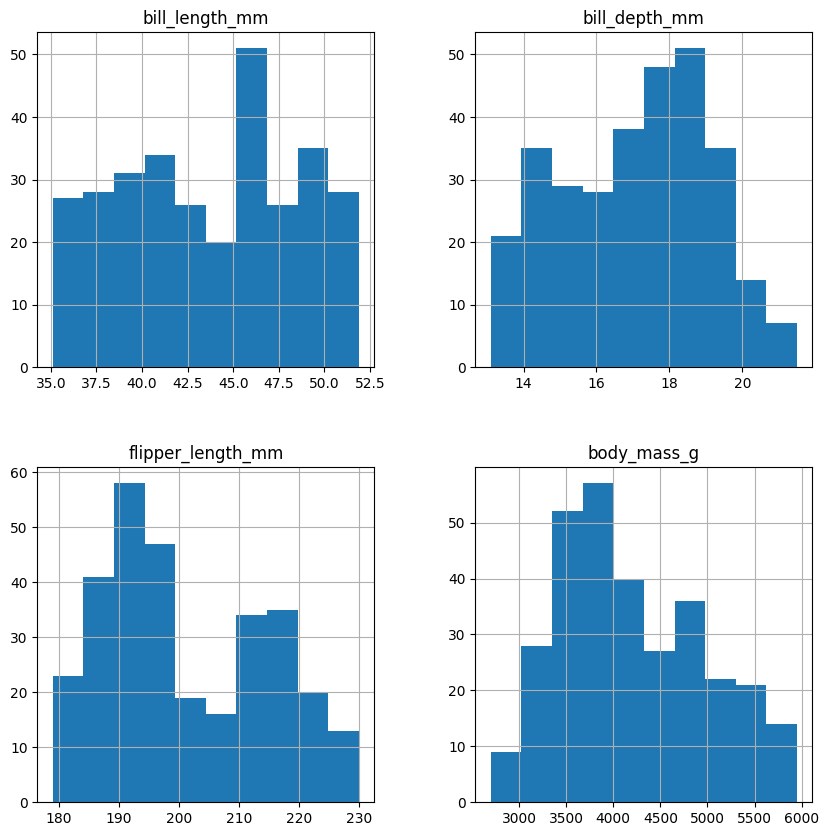

In [228]:
dataset.hist(figsize=(10,10))

##### Verification of the correlation between the features

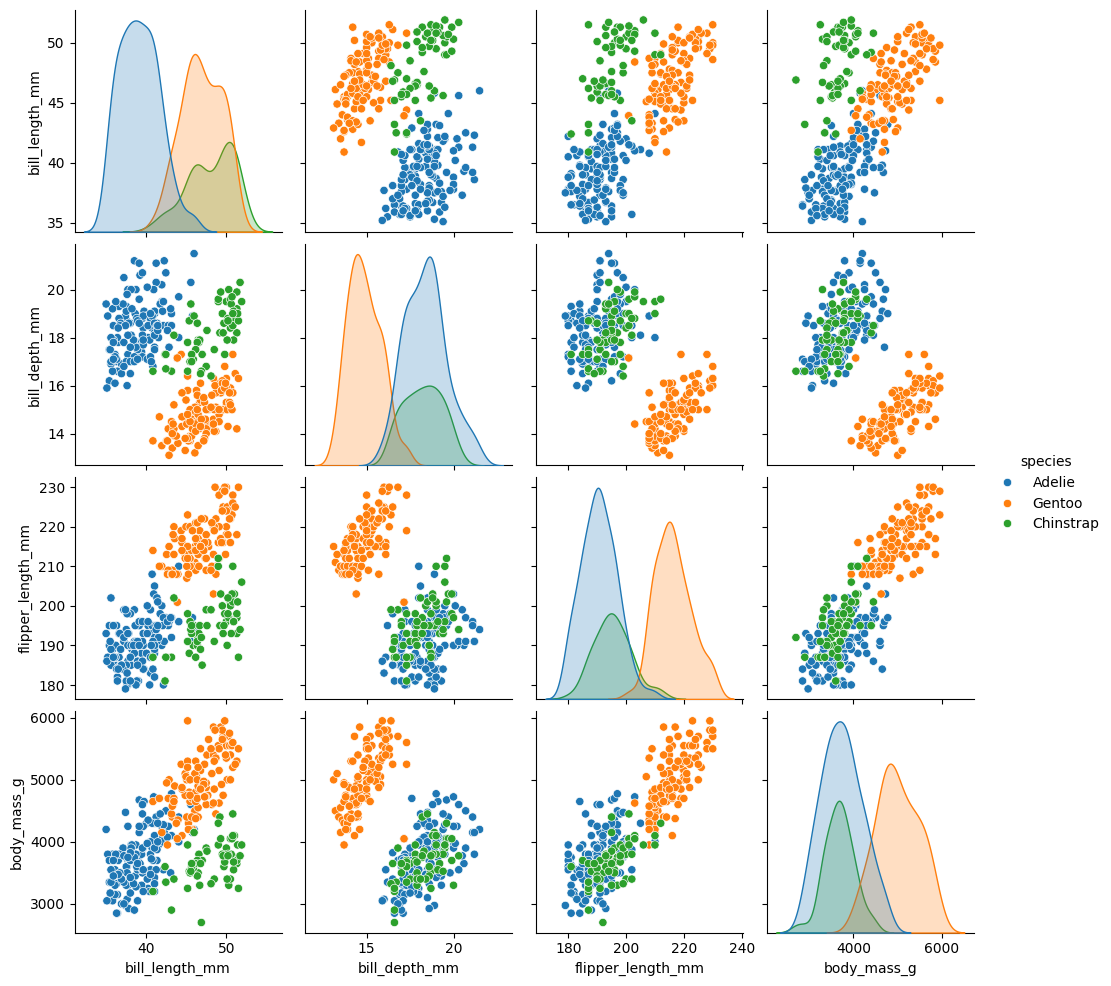

In [229]:
sns.pairplot(dataset,hue='species')

### Analyse of the sns.pairplot
According to the sns.pairplot it can be determined that the species are not represented equival equivalently

- the Specie Adelie ist most represented 
- the specie chinstrap ist the last

##### Identification of the features

In [230]:
# the are 3 group of features
groupe = [
    ["bill_length_mm","body_mass_g"],
    ["bill_length_mm","flipper_length_mm"], 
    ["bill_length_mm","bill_depth_mm"]
]

#### prepartion of the datasset

#### separation of Data

In [231]:
X = dataset.drop("species",axis=1)
y = dataset["species"].astype('category').cat.codes

##### function Classifier

In [232]:
def graph (X_train,y_train,model,column):
    h = 0.1
    x_min,x_max = X_train[:,0].min() - .5 ,X_train[:,0].max() + .5
    y_min,y_max = X_train[:,1].min() - .5 ,X_train[:,1].max() + .5

    cmap_training= ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_prediction = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.legend("")
    plt.figure(1, figsize=(6, 5))
    plt.pcolormesh(xx, yy, z,cmap=cmap_prediction)

    plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap=cmap_training )
    plt.xlabel(column[0])
    plt.ylabel(column[1])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [233]:
def classifier(model,X,y,column):
    std_scaler = StandardScaler()
    X = std_scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.33)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print(f"---> accurracy_score {accuracy_score(y_pred=predict,y_true=y_test)*100:.2f}")
    print(f"---> f1_score {f1_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> recall_score {recall_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> Confusion matrix\n {confusion_matrix(y_true=y_test,y_pred=predict)}")
    graph(X_test,predict,model,column)


['bill_length_mm', 'body_mass_g']
---> accurracy_score 90.10
---> f1_score 89.20
---> recall_score 87.90
---> Confusion matrix
 [[43  1  1]
 [ 2 15  2]
 [ 4  0 33]]


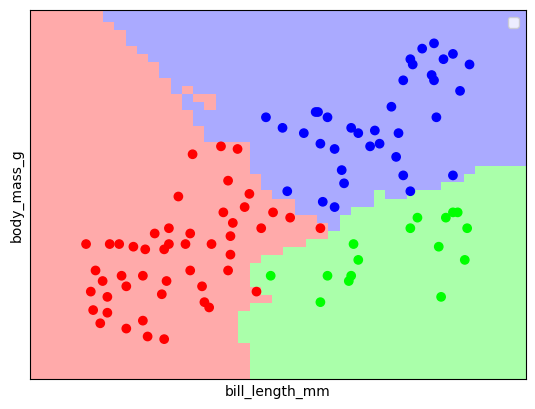

['bill_length_mm', 'flipper_length_mm']
---> accurracy_score 93.07
---> f1_score 91.12
---> recall_score 90.44
---> Confusion matrix
 [[44  1  0]
 [ 1 15  3]
 [ 1  1 35]]


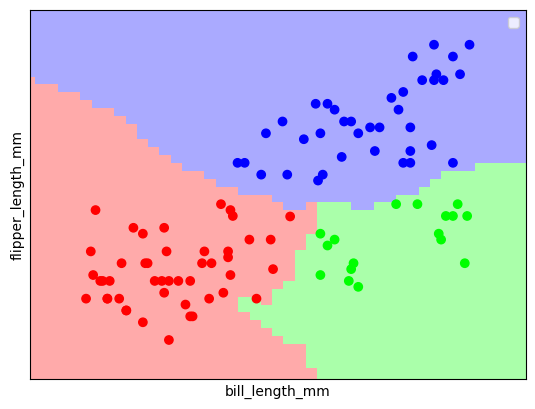

['bill_length_mm', 'bill_depth_mm']
---> accurracy_score 97.03
---> f1_score 96.67
---> recall_score 97.46
---> Confusion matrix
 [[44  1  0]
 [ 0 19  0]
 [ 1  1 35]]


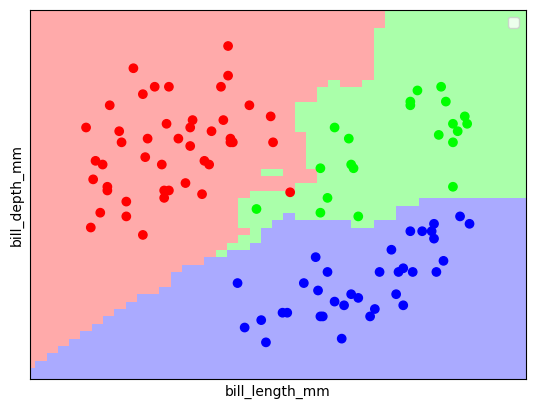

In [234]:
model = KNeighborsClassifier()
for index in groupe:
    print(index)
    X_sub = X[index]
    classifier(model,X_sub,y,index)

#### Amelioration

In [235]:
def classifier(model,X,y,column):
    std_scaler = StandardScaler()
    X = std_scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.33)
    model = GridSearchCV(model,param_grid={'n_neighbors':np.arange(1,31)})
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print(f"---> column:{column}\n<best paramter,estimator,score> : {model.best_params_,model.best_estimator_,model.best_score_}")
    print(f"---> accurracy_score {accuracy_score(y_pred=predict,y_true=y_test)*100:.2f}")
    print(f"---> f1_score {f1_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> recall_score {recall_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> Confusion matrix\n {confusion_matrix(y_true=y_test,y_pred=predict)}")
    graph(X_test,predict,model,column)

---> column:['bill_length_mm', 'body_mass_g']
<best paramter,estimator,score> : ({'n_neighbors': 19}, KNeighborsClassifier(n_neighbors=19), 0.9414634146341463)
---> accurracy_score 94.06
---> f1_score 94.62
---> recall_score 93.90
---> Confusion matrix
 [[44  0  1]
 [ 1 18  0]
 [ 4  0 33]]


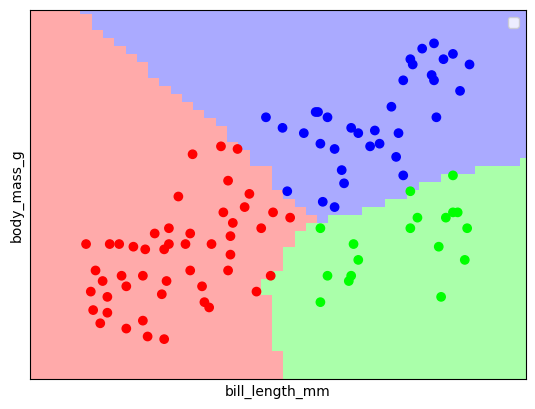

---> column:['bill_length_mm', 'flipper_length_mm']
<best paramter,estimator,score> : ({'n_neighbors': 5}, KNeighborsClassifier(), 0.9609756097560975)
---> accurracy_score 93.07
---> f1_score 91.12
---> recall_score 90.44
---> Confusion matrix
 [[44  1  0]
 [ 1 15  3]
 [ 1  1 35]]


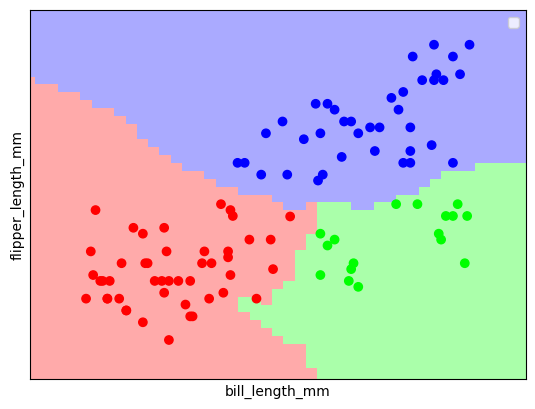

---> column:['bill_length_mm', 'bill_depth_mm']
<best paramter,estimator,score> : ({'n_neighbors': 3}, KNeighborsClassifier(n_neighbors=3), 0.9609756097560975)
---> accurracy_score 97.03
---> f1_score 96.67
---> recall_score 97.46
---> Confusion matrix
 [[44  1  0]
 [ 0 19  0]
 [ 1  1 35]]


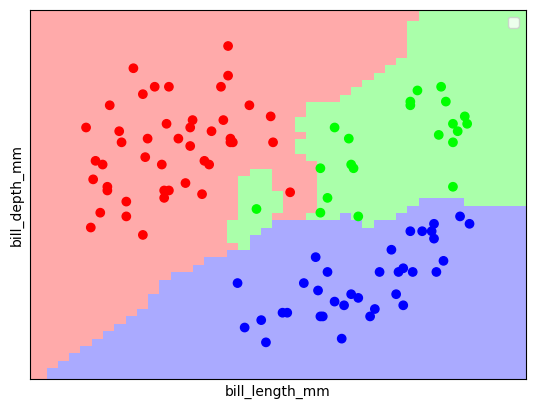

In [236]:
model = KNeighborsClassifier()
for index in groupe:
    X_sub = X[index]
    classifier(model,X_sub,y,index)

### RandomForest

In [237]:
def classifier(model,X,y,column):
    std_scaler = StandardScaler()
    parameter = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    X = std_scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.33)
    model = GridSearchCV(model,param_grid=parameter)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print(f'---> Column {column}')
    print(f"---> <best paramter> : {model.best_params_,model.best_estimator_,model.best_score_}")
    print(f"---> accurracy_score {accuracy_score(y_pred=predict,y_true=y_test)*100:.2f}")
    print(f"---> f1_score {f1_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> recall_score {recall_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> Confusion matrix \n{confusion_matrix(y_true=y_test,y_pred=predict)}")
    

In [238]:
model = RandomForestClassifier()
for index in groupe:
    X_sub = X[index]
    classifier(model,X_sub,y,index)

---> Column ['bill_length_mm', 'body_mass_g']
---> <best paramter> : ({'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}, RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50), 0.9268292682926829)
---> accurracy_score 92.08
---> f1_score 91.93
---> recall_score 91.41
---> Confusion matrix 
[[43  1  1]
 [ 0 17  2]
 [ 4  0 33]]
---> Column ['bill_length_mm', 'flipper_length_mm']
---> <best paramter> : ({'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}, RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200), 0.9658536585365853)
---> accurracy_score 94.06
---> f1_score 92.53
---> recall_score 92.19
---> Confusion matrix 
[[44  1  0]
 [ 0 16  3]
 [ 1  1 35]]
---> Column ['bill_length_mm', 'bill_depth_mm']
---> <best paramter> : ({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, RandomForestCl

###  Decision Tree

In [239]:
def classifier(model,X,y,column):
    std_scaler = StandardScaler()
    parameter = {
        "max_depth":np.arange(1,10)
    }
    X = std_scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.33)
    model = GridSearchCV(model,param_grid=parameter)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print(f'---> Column {column}')
    print(f"---> <best paramter,estimator,score> : {model.best_params_,model.best_estimator_,model.best_score_}")
    print(f"---> accurracy_score {accuracy_score(y_pred=predict,y_true=y_test)*100:.2f}")
    print(f"---> f1_score {f1_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> recall_score {recall_score(y_pred=predict,y_true=y_test,average='macro')*100:.2f}")
    print(f"---> Confusion matrix \n{confusion_matrix(y_true=y_test,y_pred=predict)}")
    

In [240]:
model = DecisionTreeClassifier(criterion='entropy')
for index in groupe:
    X_sub = X[index]
    classifier(model,X_sub,y,index)

---> Column ['bill_length_mm', 'body_mass_g']
---> <best paramter,estimator,score> : ({'max_depth': 2}, DecisionTreeClassifier(criterion='entropy', max_depth=2), 0.9024390243902438)
---> accurracy_score 89.11
---> f1_score 87.44
---> recall_score 87.16
---> Confusion matrix 
[[42  1  2]
 [ 0 15  4]
 [ 2  2 33]]
---> Column ['bill_length_mm', 'flipper_length_mm']
---> <best paramter,estimator,score> : ({'max_depth': 5}, DecisionTreeClassifier(criterion='entropy', max_depth=5), 0.9414634146341463)
---> accurracy_score 92.08
---> f1_score 89.89
---> recall_score 89.54
---> Confusion matrix 
[[44  1  0]
 [ 1 15  3]
 [ 1  2 34]]
---> Column ['bill_length_mm', 'bill_depth_mm']
---> <best paramter,estimator,score> : ({'max_depth': 5}, DecisionTreeClassifier(criterion='entropy', max_depth=5), 0.9365853658536585)
---> accurracy_score 94.06
---> f1_score 92.70
---> recall_score 93.05
---> Confusion matrix 
[[44  1  0]
 [ 0 17  2]
 [ 1  2 34]]
